# Comparision of Sputnik/Classic VMs benchmarks

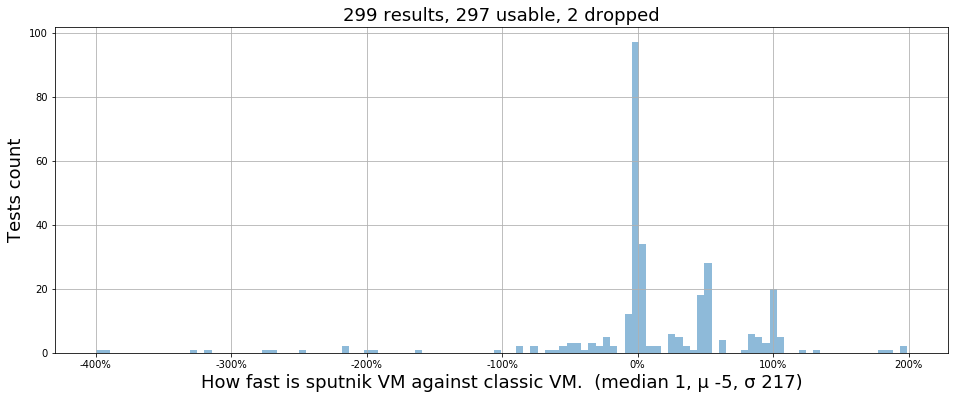

# How fast and slow is Sputnik VM against Classic VM by tests

,,,
Name,Sputnik vs Classic,Sputnik,Classic
Memory/mem32kb_singleByte-1,199% faster,0.001s,0.003s
Memory/mem64kb_singleByte+33,197% faster,0.001s,0.003s
Memory/mem64kb_singleByte+32,188% faster,0.001s,0.003s
Memory/mem32kb_singleByte-31,180% faster,0.001s,0.003s
BlockHash/blockhashDOS-sec71,133% faster,1.452s,3.397s
SystemOperations/CallRecursiveBomb3,121% faster,0.103s,0.228s
Memory/mem32kb_singleByte-32,108% faster,0.001s,0.002s
Memory/log4_dejavu,107% faster,0.001s,0.002s
Memory/mload8bitBound,107% faster,0.001s,0.002s


# TOP calls

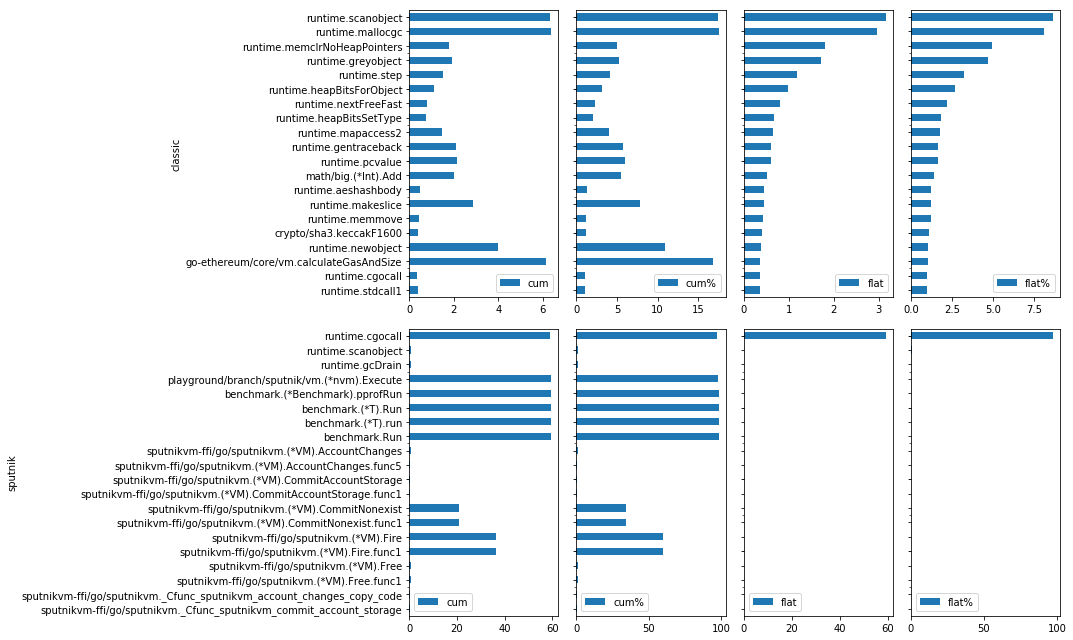

# Top calls on Classic VM

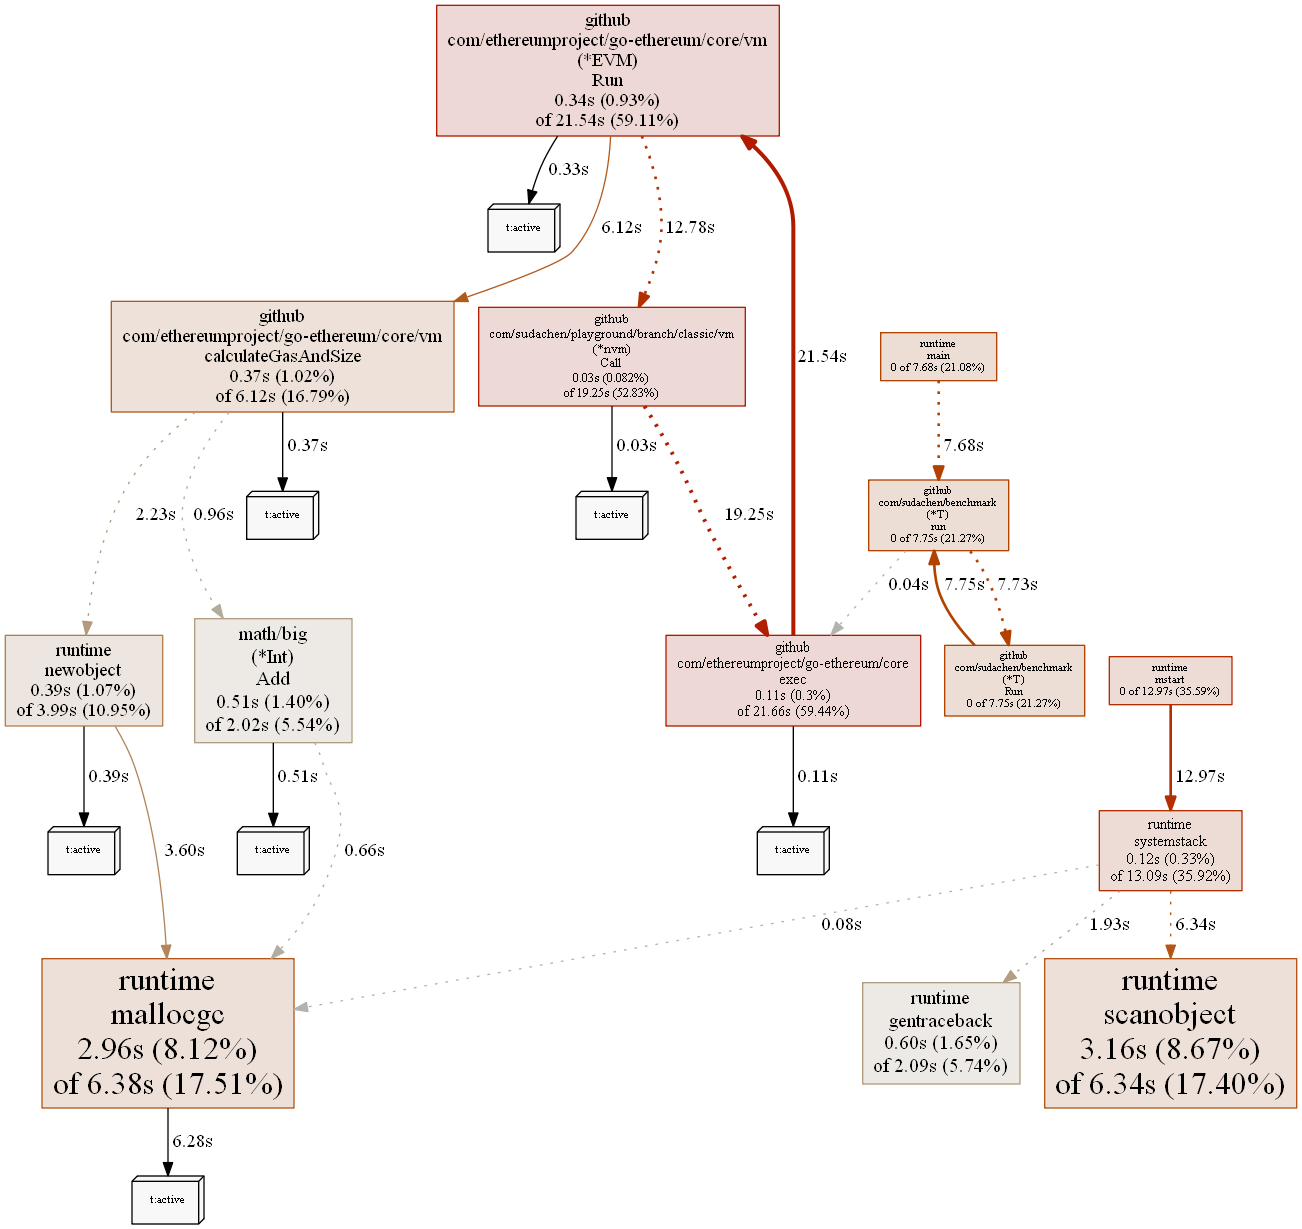

# Top calls on Sputnik VM

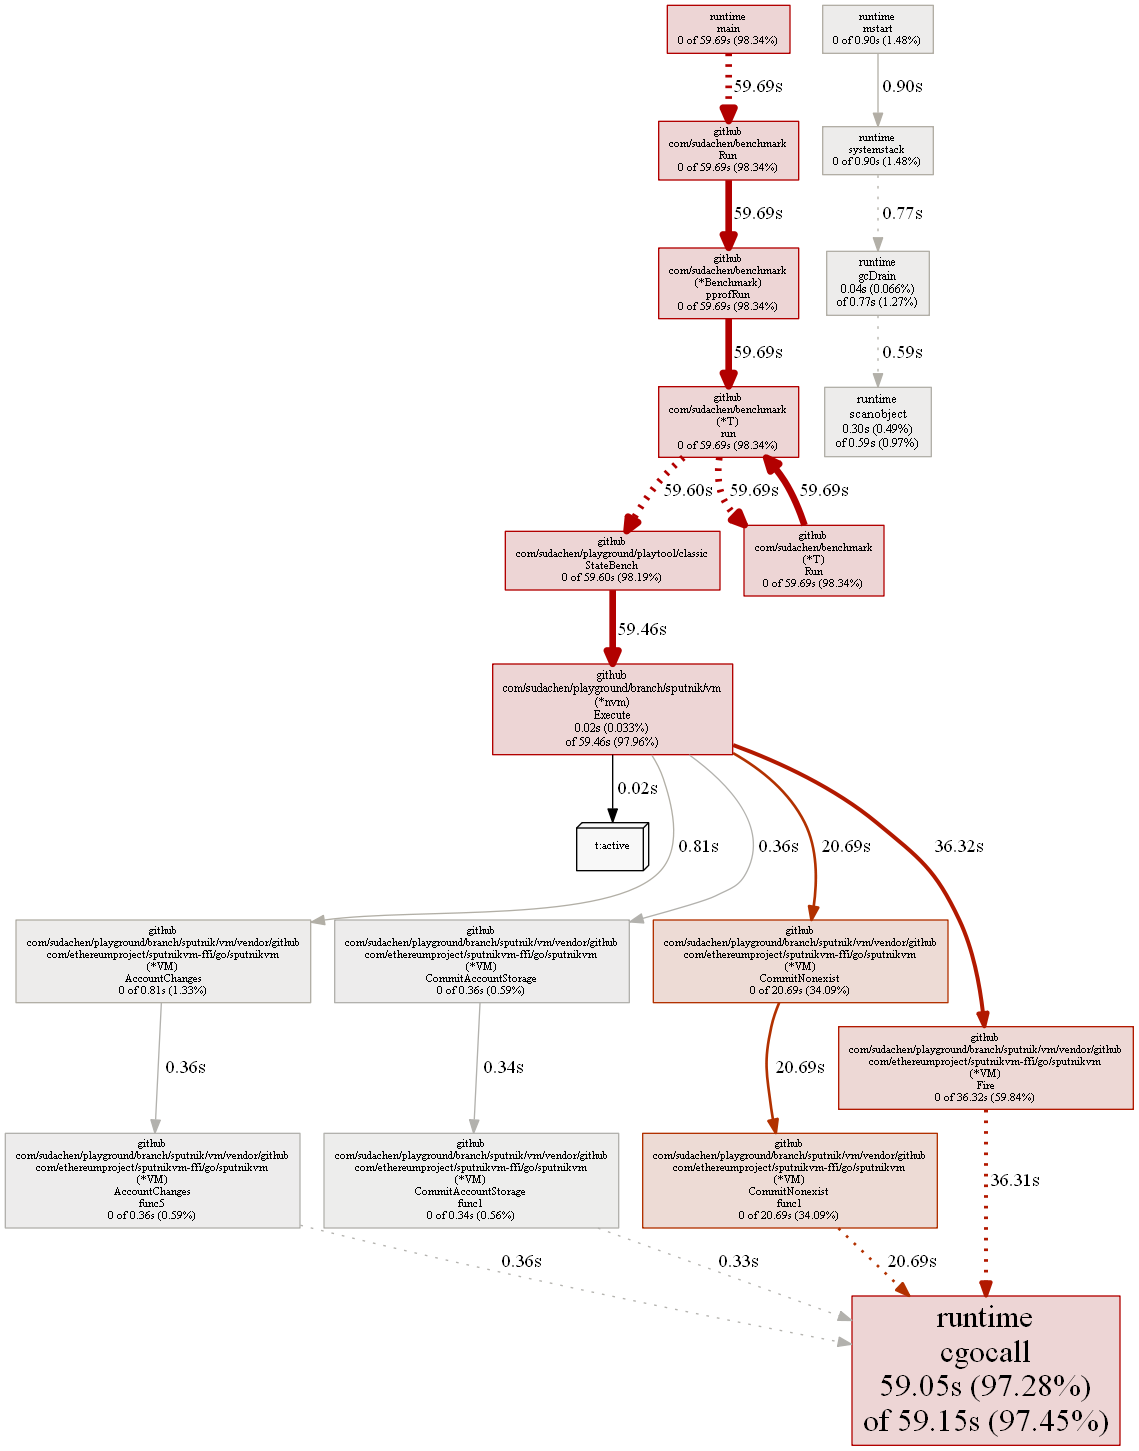

# TOP allocs

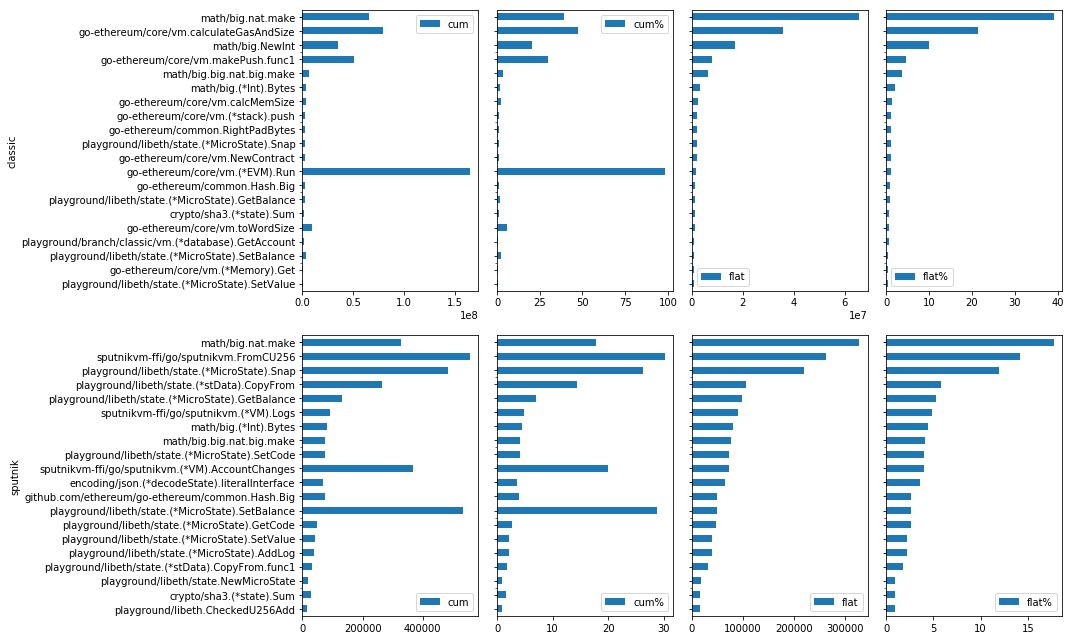

# Top allocs on Classic VM

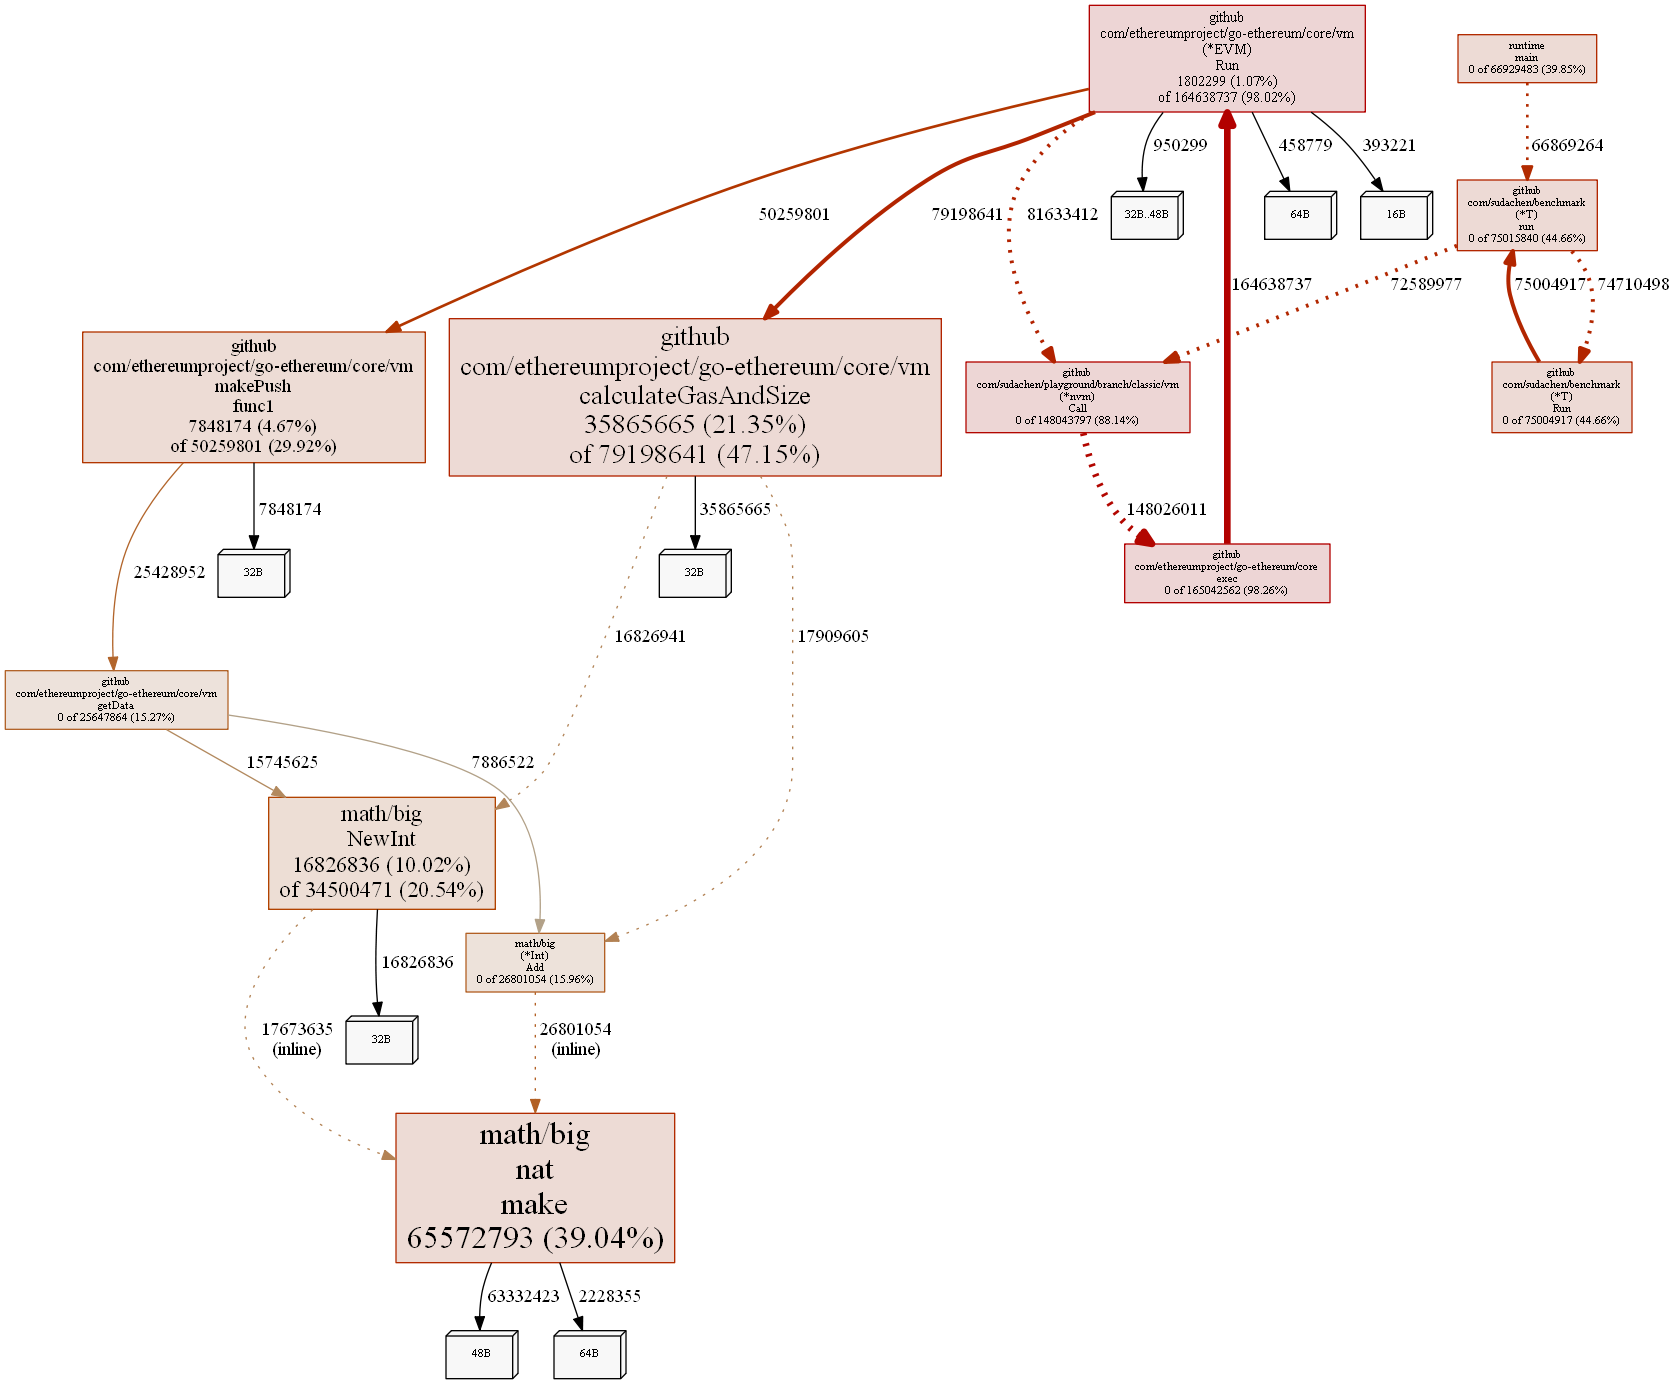

# Top allocs on Sputnik VM

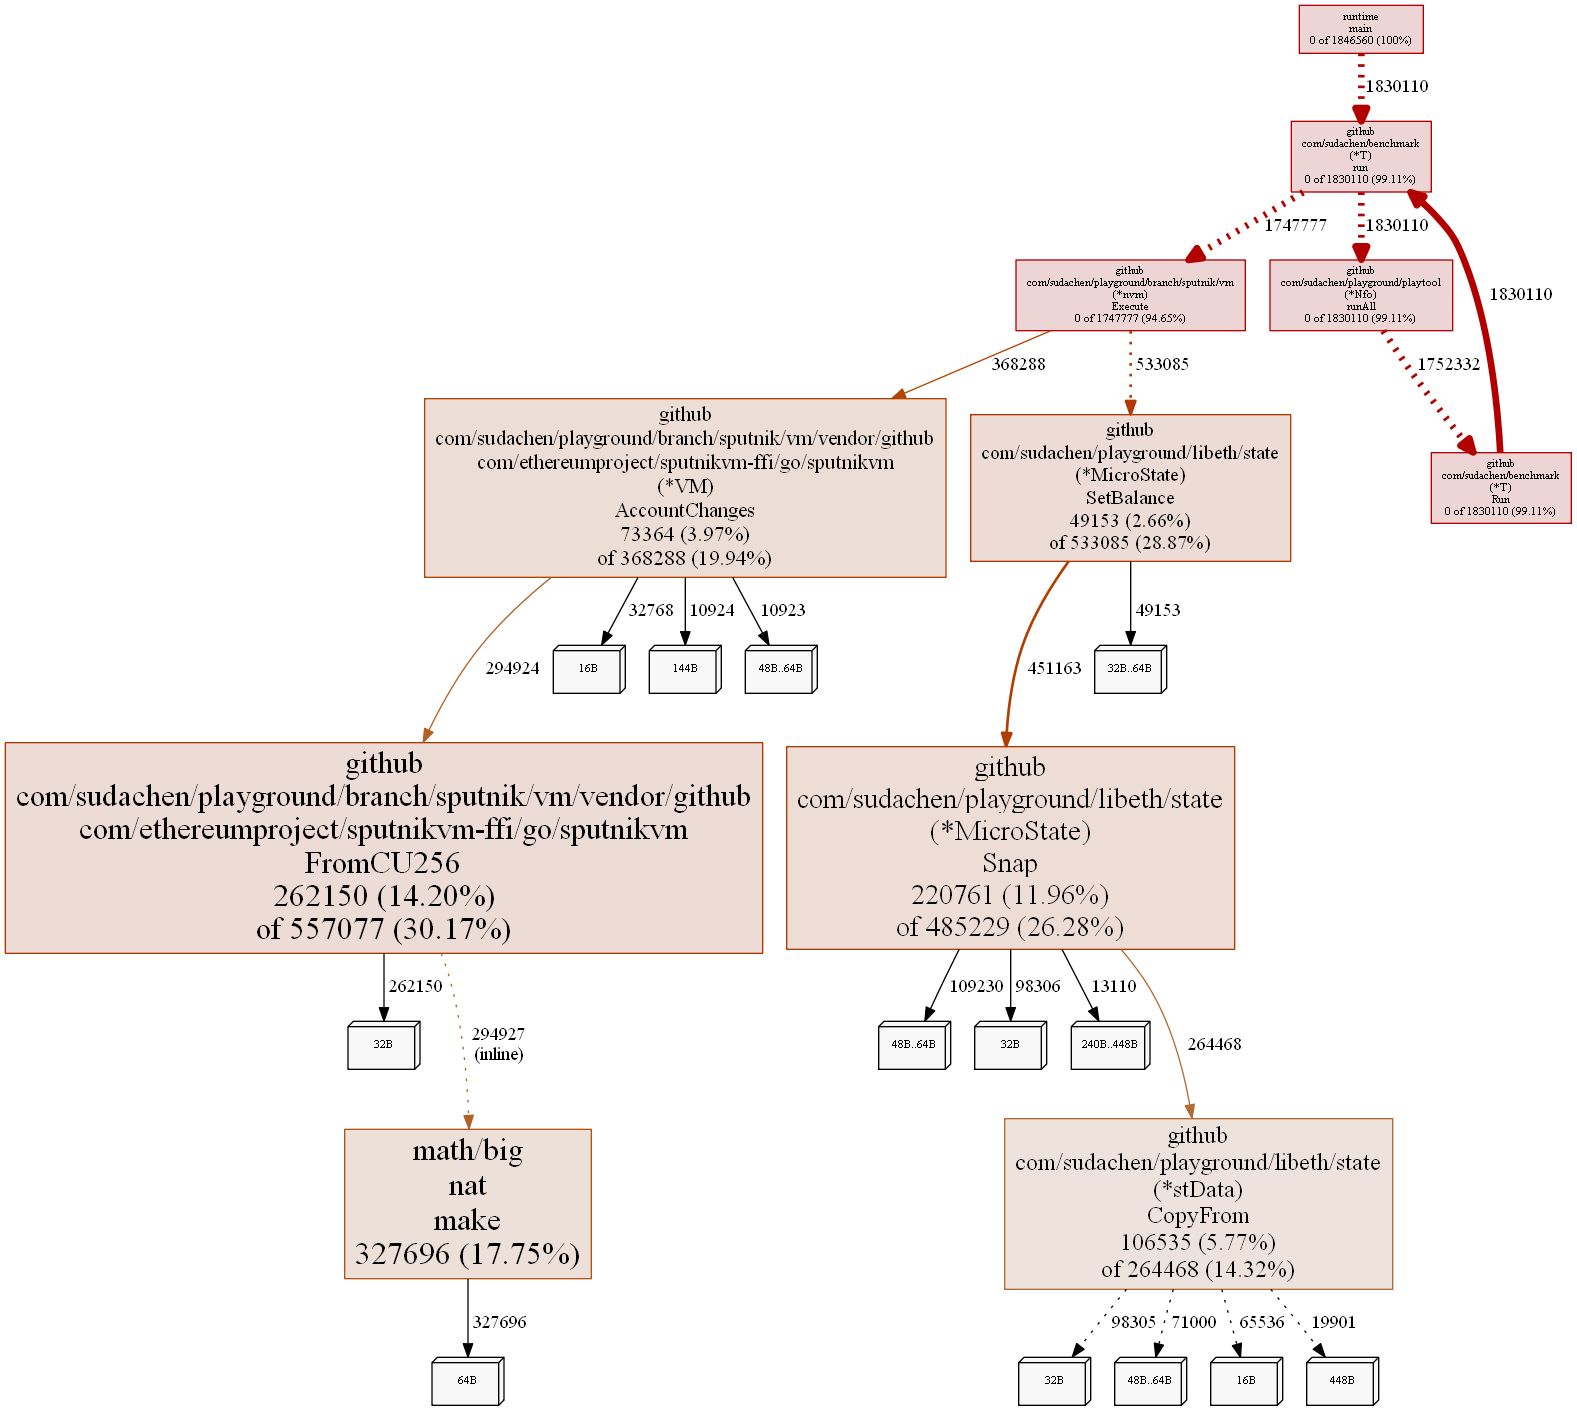

In [1]:
import vmbench
vmbench.bench_and_report('classic','sputnik')